# Open Mini-Challenge: Steuerdaten einer Gemeinde im Kanton Solothurn

## Gemeinde-Daten generieren

In diesem Notebook generieren wir die Einwohnerzahlen für die imaginäre Gemeinde "Sonnenberg" im Kanton Solothurn. Die Daten sind fiktiv und dienen nur zu Übungszwecken.

### 1. Daten einlesen & bereinigen

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('../Daten/Bevölkerung_SO.csv', sep=';', usecols=[0,1])
data.head()

,Datum,KT_SO
0,31.12.1970,226932
1,31.12.1971,228511
2,31.12.1972,229214
3,31.12.1973,231066
4,31.12.1974,231391


### 2. Einwohnerzahlen generieren

Für das minimum und maximum haben wir ähnliche Werte aus einer realen Gemeinde im Kanton Solothurn genommen. Alle Daten dazwischen werden zufällig mit einem Trend von 0.3 und Random Seed von 2 generiert. Diese fiktive Daten werden dann mit unseren realen Daten zusammengefügt, sprich die gesamte Bevölkerung des Kantons Solothurn, und als csv Datei exportiert.

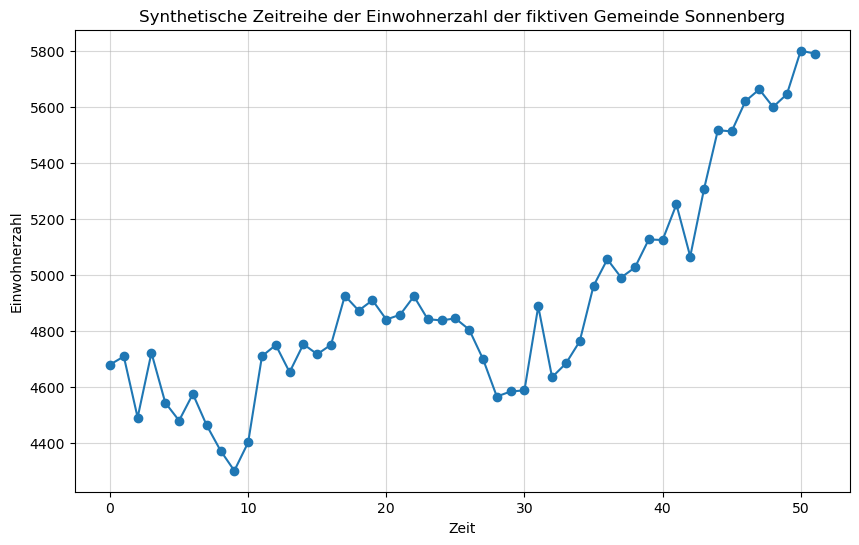

In [2]:
# Parameters for synthetic time series generation
n_points = 52  # approx. number of data points in the original series
scale_min = 4300  # approx. minimum value on the y-axis
scale_max = 5800  # approx. maximum value on the y-axis
trend_strength = 0.3  # adjust this to increase/decrease the trend

# Generate a random time series with a trend
np.random.seed(2)  # for reproducibility
time_series = np.random.randn(n_points).cumsum() + np.arange(n_points) * trend_strength

# Scale the series to match the approximate range of the original series
scaler = MinMaxScaler(feature_range=(scale_min, scale_max))
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# convert time series to int
time_series_scaled = time_series_scaled.astype(int)

# Plot the synthetic time series
plt.figure(figsize=(10, 6))
plt.plot(time_series_scaled, marker='o', linestyle='-')
plt.title('Synthetische Zeitreihe der Einwohnerzahl der fiktiven Gemeinde Sonnenberg')
plt.xlabel('Zeit')
plt.ylabel('Einwohnerzahl')
plt.grid(True, alpha=0.5)
plt.show()

# Return the generated time series data list
time_series_data = time_series_scaled.tolist()

# add the time series data to the dataframe
data['Sonnenberg'] = time_series_data

# export the data as csv
data.to_csv('../Daten/Bevölkerung_SO_Neu.csv', sep=';', index=False)